<a href="https://colab.research.google.com/github/Ozz303/Capstone-Project-IBM-Skillsbuild/blob/main/CapStone_Bagus_Rian_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.0 MB/s eta 0:00:00


In [3]:
!pip -q install pandas pyarrow matplotlib plotly scikit-learn

In [4]:
from google.colab import userdata
import os

# ambil token dari colab
api_token = userdata.get('api_token')

# taro token ke env. var.
os.environ['REPLICATE_API_TOKEN'] = api_token

In [5]:
from langchain_community.llms import Replicate

# Ambil granite dari replicate
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct"
)

**IMPORT DATASET**

In [7]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Membaca tiap file dengan variabel berbeda
df_acc  = pd.read_csv('/content/drive/MyDrive/capstone/acc_20.csv', encoding='latin1')
df_pers = pd.read_csv('/content/drive/MyDrive/capstone/pers_20.csv', encoding='latin1')
df_veh  = pd.read_csv('/content/drive/MyDrive/capstone/veh_20.csv', encoding='latin1')

print(df_acc.head())
print(df_pers.head())
print(df_veh.head())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-980086777.py:9: DtypeWarning: Columns (45,47,127) have mixed types. Specify dtype option on import or set low_memory=False.
  df_veh  = pd.read_csv('/content/drive/MyDrive/capstone/veh_20.csv', encoding='latin1')


        CASENUM  STRATUM                              STRATUMNAME  REGION  \
0  202002121240        9  Stratum 9 - LMY PV No Injuries in Crash       4   
1  202002121829        8         Stratum 8 - NLMY PV Minor Injury       3   
2  202002121849        9  Stratum 9 - LMY PV No Injuries in Crash       3   
3  202002123484       10                       Stratum 10 - Other       4   
4  202002123576       10                       Stratum 10 - Other       1   

                                          REGIONNAME  PSU    PJ  PSU_VAR  \
0  West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...   20  4140       20   
1  South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...   28  4139       28   
2  South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...   12  4142       12   
3  West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...   20  4140       20   
4     Northeast (PA, NJ, NY, NH, VT, RI, MA, ME, CT)   22  4149       22   

   URBANICITY URBANICITYNAME  ...  WEATHR_IM  WEATHR_IMNAME  MAXSEV_IM  \
0     

In [9]:
acc_cols = ['CASENUM','MONTH','MONTHNAME','HOUR','HOURNAME',
            'URBANICITYNAME','REGIONNAME','VE_TOTAL','PEDS','NUM_INJ']

veh_cols = ['CASENUM','VEH_NO','NUMOCCS','NUMOCCSNAME','MONTH','MONTHNAME','HOUR','HOURNAME']

per_cols = ['CASENUM','VEH_NO','PER_NO','AGE','SEX','INJ_SEV','SEAT_POS']




In [11]:
acc_sel = df_acc[acc_cols].copy()
veh_sel = df_veh[veh_cols].copy()
per_sel = df_pers[per_cols].copy()

In [12]:
# Contoh: ubah HOUR jadi integer
acc_sel['HOUR'] = pd.to_numeric(acc_sel['HOUR'], errors='coerce')
veh_sel['HOUR'] = pd.to_numeric(veh_sel['HOUR'], errors='coerce')

# Cek missing values
print(acc_sel.isnull().sum())
print(veh_sel.isnull().sum())
print(per_sel.isnull().sum())

CASENUM           0
MONTH             0
MONTHNAME         0
HOUR              0
HOURNAME          0
URBANICITYNAME    0
REGIONNAME        0
VE_TOTAL          0
PEDS              0
NUM_INJ           0
dtype: int64
CASENUM          0
VEH_NO           0
NUMOCCS          0
NUMOCCSNAME    177
MONTH            0
MONTHNAME        0
HOUR             0
HOURNAME         0
dtype: int64
CASENUM     0
VEH_NO      0
PER_NO      0
AGE         0
SEX         0
INJ_SEV     0
SEAT_POS    0
dtype: int64


**EXPLOR DATA**

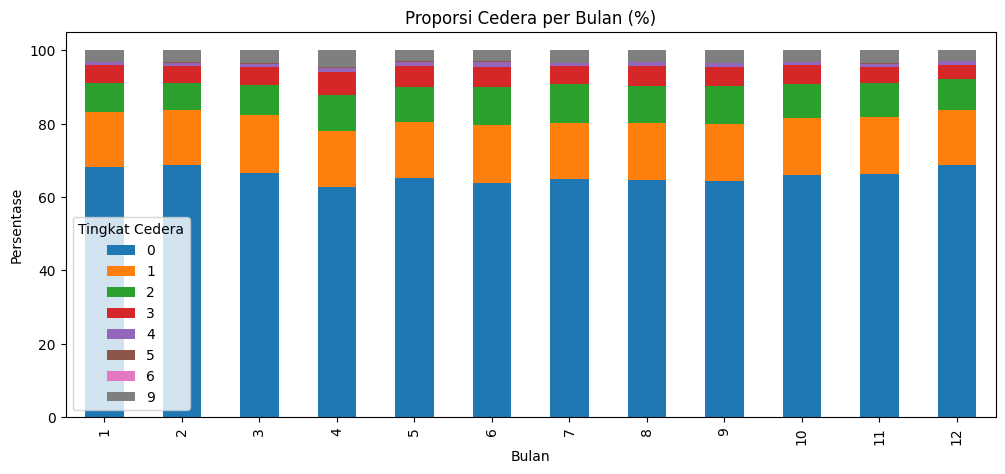

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Contoh: merge ketiga dataset berdasarkan key tertentu
full = df_acc.merge(df_pers, on="CASENUM") \
             .merge(df_veh, on="CASENUM")

# Baru jalankan analisis
injury_by_month = (
    full.groupby('MONTH_y')['INJ_SEV']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)

injury_by_month.plot(kind='bar', stacked=True, figsize=(12,5))
plt.title("Proporsi Cedera per Bulan (%)")
plt.xlabel("Bulan")
plt.ylabel("Persentase")
plt.legend(title="Tingkat Cedera")
plt.show()


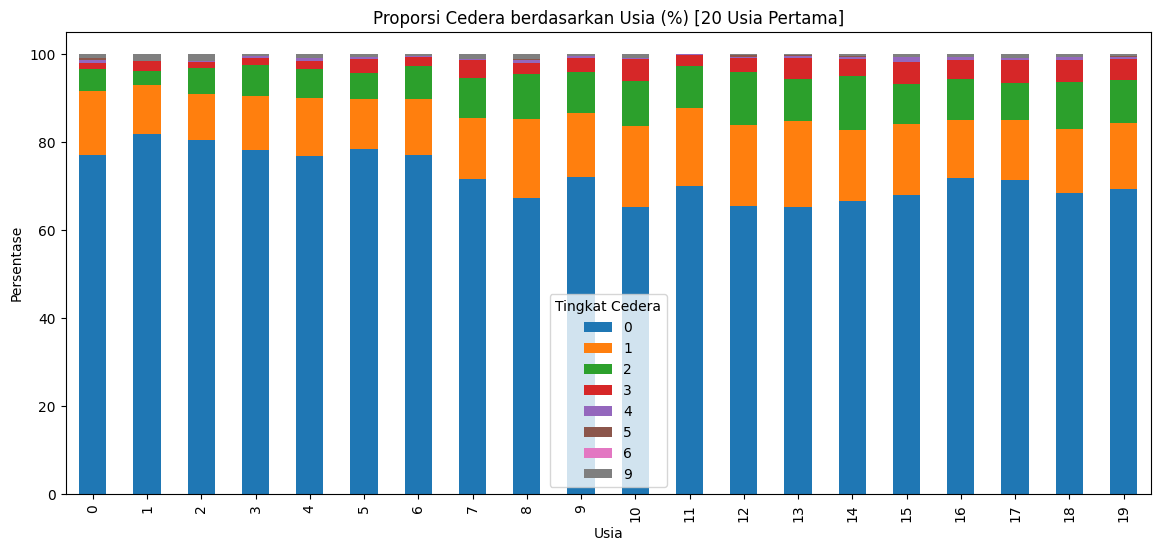

In [18]:
injury_by_age = (
    full.groupby('AGE')['INJ_SEV']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)

injury_by_age.head(20).plot(kind='bar', stacked=True, figsize=(14,6))
plt.title("Proporsi Cedera berdasarkan Usia (%) [20 Usia Pertama]")
plt.xlabel("Usia")
plt.ylabel("Persentase")
plt.legend(title="Tingkat Cedera")
plt.show()

<Axes: title={'center': 'Cedera berdasarkan Jam (Accident-level HOUR)'}, xlabel='HOUR_y'>

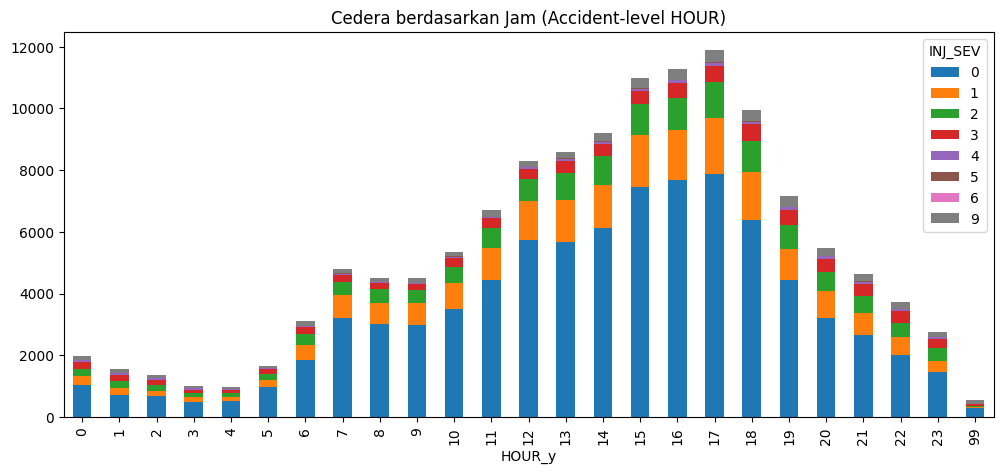

In [19]:
# Join persons + vehicles
per_veh = pd.merge(per_sel, veh_sel, on=['CASENUM','VEH_NO'], how='left')

# Join dengan accidents
full = pd.merge(per_veh, acc_sel, on='CASENUM', how='left')

# Contoh: distribusi cedera berdasarkan jam
injury_by_hour = full.groupby('HOUR_y')['INJ_SEV'].value_counts().unstack().fillna(0)
injury_by_hour.plot(kind='bar', stacked=True, figsize=(12,5), title="Cedera berdasarkan Jam (Accident-level HOUR)")

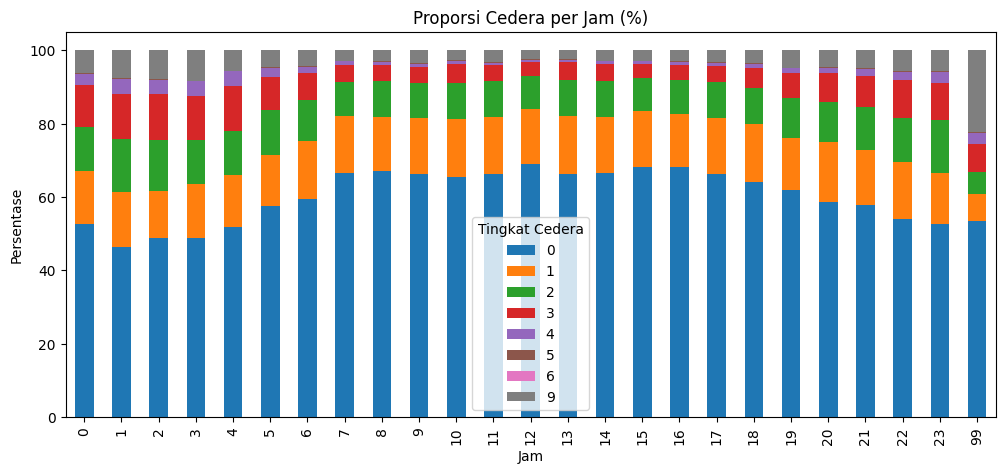

In [20]:
# Hitung proporsi cedera per jam
injury_by_hour = (
    full.groupby('HOUR_y')['INJ_SEV']
    .value_counts(normalize=True)  # pakai proporsi (%)
    .unstack()
    .fillna(0) * 100  # ubah ke persen
)

# Plot
injury_by_hour.plot(kind='bar', stacked=True, figsize=(12,5))
plt.title("Proporsi Cedera per Jam (%)")
plt.xlabel("Jam")
plt.ylabel("Persentase")
plt.legend(title="Tingkat Cedera")
plt.show()

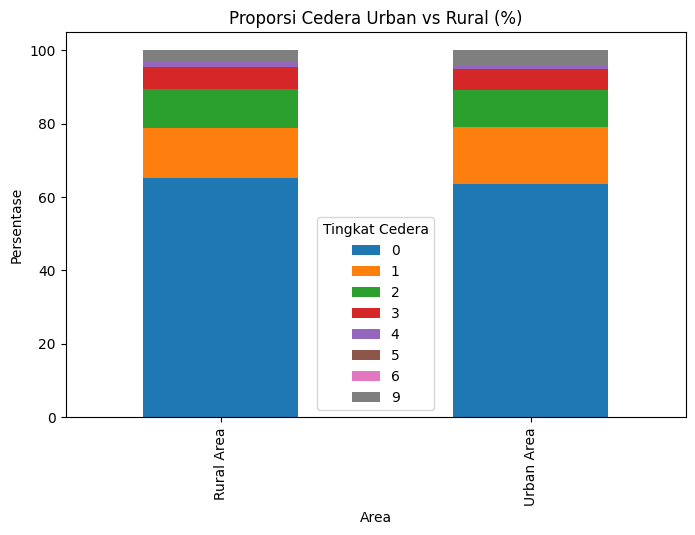

In [21]:
injury_by_area = (
    full.groupby('URBANICITYNAME')['INJ_SEV']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)

injury_by_area.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Proporsi Cedera Urban vs Rural (%)")
plt.xlabel("Area")
plt.ylabel("Persentase")
plt.legend(title="Tingkat Cedera")
plt.show()

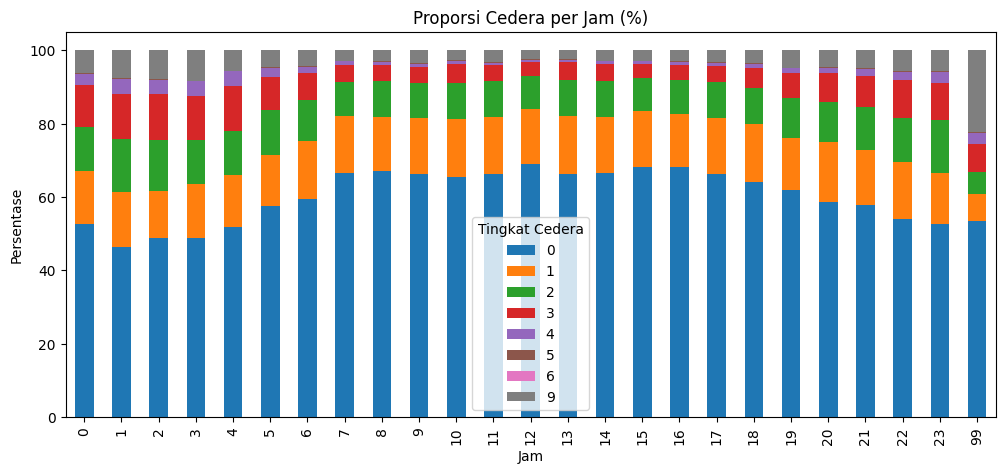

In [22]:
# Hitung proporsi cedera per jam
injury_by_hour = (
    full.groupby('HOUR_y')['INJ_SEV']
    .value_counts(normalize=True)  # pakai proporsi (%)
    .unstack()
    .fillna(0) * 100  # ubah ke persen
)

# Plot
injury_by_hour.plot(kind='bar', stacked=True, figsize=(12,5))
plt.title("Proporsi Cedera per Jam (%)")
plt.xlabel("Jam")
plt.ylabel("Persentase")
plt.legend(title="Tingkat Cedera")
plt.show()

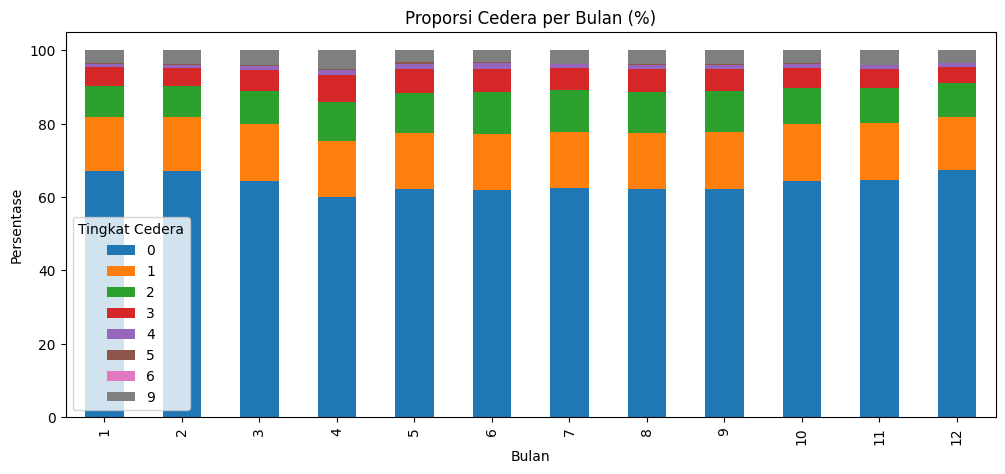

In [23]:
injury_by_month = (
    full.groupby('MONTH_y')['INJ_SEV']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)

injury_by_month.plot(kind='bar', stacked=True, figsize=(12,5))
plt.title("Proporsi Cedera per Bulan (%)")
plt.xlabel("Bulan")
plt.ylabel("Persentase")
plt.legend(title="Tingkat Cedera")
plt.show()


In [24]:
summary_prompt = f"""
Saya menganalisis dataset kecelakaan lalu lintas 2020.
Berikut beberapa hasil analisis berbasis proporsi (%):

- Distribusi cedera per jam: {injury_by_hour.mean().to_dict()}
- Distribusi cedera per area (urban/rural): {injury_by_area.mean().to_dict()}
- Distribusi cedera per bulan: {injury_by_month.mean().to_dict()}

Tolong buatkan:
1. Ringkasan pola utama (3–4 poin).
2. 3 rekomendasi konkrit untuk pencegahan kecelakaan.
3. Tulis dengan bahasa sederhana agar mudah dipahami.
"""

# Jalankan LLM
response = llm.invoke(summary_prompt)
print("=== Ringkasan Granite ===")
print(response)

=== Ringkasan Granite ===
1. **Ringkasan Polanya Utama**:
   - **Jam Pemesanan Terjadi Lebih Banyak**: Kecelakaan lalu lintas paling banyak terjadi pada jam 0 (sebelum pukul 12 siang), yang mungkin karena jam bekerja atau perjalanan pulang dari kerja.
   - **Kecelakaan Lalu Lintas Urban Lebih Banyak**: Lebih banyak kecelakaan terjadi di kota berbanding di daerah perdesaan, mungkin karena lebih banyak kendaraan dan pengguna jalan.
   - **Kecelakaan Terjadi Lebih Banyak di Bulan Tertentu**: Ada fluktuasi, tetapi sebagian besar bulan memiliki proporsi kecelakaan yang sama, dengan beberapa bulan (misalnya bulan Januari) lebih tinggi atau lebih rendah.

2. **Rekomendasi Pencegahan**:
   - **Perbaikan Infrastruktur Jalan**: Perbaikan jalan ruta yang buruk, pencairan jalan yang tidak teratur, dan penambahaan tanda-tanda lalu lintas dapat mengurangi kecelakaan.
   - **Program Pendidikan dan Pemantauan**: Implementasikan program pendidikan kecil tentang keselamatan lalu lintas untuk semua pengg